In [1]:
from __future__ import print_function, division

import sys
import numpy as np
import thinkstats2

from collections import defaultdict

In [2]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [3]:
# Page 35-36: 3-1 
#Exercise: Something like the class size paradox appears if you survey children and ask how many children are in their family. 
#Families with many children are more likely to appear in your sample, and families with no children have no chance to be in 
#the sample.
#Use the NSFG respondent variable numkdhh to construct the actual distribution for the number of children under 18 in the respondents' households.
#Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 
#18 (including themselves) are in their household.
#Plot the actual and biased distributions, and compute their means.

In [4]:
resp = nsfg.ReadFemResp()

In [5]:
pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')

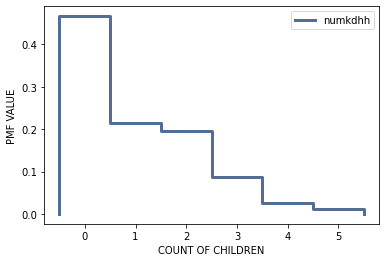

In [6]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='COUNT OF CHILDREN', ylabel='PMF VALUE')

In [7]:
bias_set = BiasPmf(pmf, label='biased')

NameError: name 'BiasPmf' is not defined

In [8]:
biased = BiasPmf(pmf, label='biased')

NameError: name 'BiasPmf' is not defined

In [9]:
# Creating function for BiasPmf
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

In [10]:
biased = BiasPmf(pmf, label='biased')

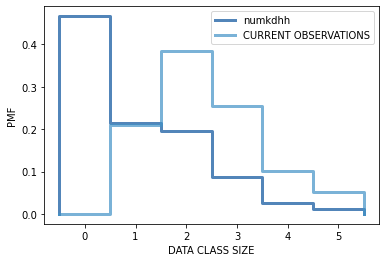

In [11]:
biased_pmf = BiasPmf(pmf, label='CURRENT OBSERVATIONS')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='DATA CLASS SIZE', ylabel='PMF')

In [12]:
print('REAL MEAN', pmf.Mean())
print('OBSERVED MEAN', biased_pmf.Mean())

REAL MEAN 1.024205155043831
OBSERVED MEAN 2.403679100664282


In [13]:
pmf.Mean()

1.024205155043831

In [14]:
biased.Mean()

2.403679100664282

In [15]:
from __future__ import print_function

import numpy as np
import sys

import nsfg
import first
import thinkstats2
import thinkplot

In [16]:
import statistics

IndentationError: expected an indented block (<ipython-input-17-dfefb936050b>, line 4)

In [18]:
# Writing new function: PmfMean

def PmfMean(pmf):
    mean = 0.0
    for x, p in pmf.d.items():
        mean += p * x # Appending new value to variable
    return mean

In [19]:
# Writing new function PmfVar

def PmfVar(pmf, mu=None):
    if mu is None:
        mu = pmf.Mean()
    var = 0.0
    for x, p in pmf.d.items():
        var += p * (x - mu) ** 2 # Appending new value to variable
    return var

In [20]:
# Checking for differences between the two PMFs (as per solution in chapter 3 code)

def PairWiseDifferences(live):
    
    live = live[live.prglngth >= 37]
    preg_map = nsfg.MakePregMap(live)

    diffs = []
    for caseid, indices in preg_map.items():
        lengths = live.loc[indices].prglngth.values
        if len(lengths) >= 2:
            diffs.extend(Diffs(lengths))

    mean = thinkstats2.Mean(diffs)
    print('Mean difference between pairs', mean)

    pmf = thinkstats2.Pmf(diffs)
    thinkplot.Hist(pmf, align='center')
    thinkplot.Show(xlabel='Difference in weeks',
                   ylabel='PMF')



In [21]:
     live, firsts, others = first.MakeFrames()
    PairWiseDifferences(live)

    # test PmfMean and PmfVar
    prglngth = live.prglngth
    pmf = thinkstats2.Pmf(prglngth)
    mean = PmfMean(pmf)
    var = PmfVar(pmf)

    assert(mean == pmf.Mean())
    assert(var == pmf.Var())
    print('mean/var preg length', mean, var)

    print('%s: All tests passed.' % script)

IndentationError: unexpected indent (<ipython-input-21-a7f13a69a9c9>, line 2)

In [22]:
 prglngth = live.prglngth
    pmf = thinkstats2.Pmf(prglngth)
    mean = PmfMean(pmf)
    var = PmfVar(pmf)


IndentationError: unexpected indent (<ipython-input-22-1d470f4dfdcc>, line 2)

In [23]:
def main(script):
    

  
    live, firsts, others = first.MakeFrames()
    PairWiseDifferences(live)

    # test PmfMean and PmfVar
    prglngth = live.prglngth
    pmf = thinkstats2.Pmf(prglngth)
    mean = PmfMean(pmf)
    var = PmfVar(pmf)

    assert(mean == pmf.Mean())
    assert(var == pmf.Var())
    print('mean/var preg length', mean, var)

    print('%s: All tests passed.' % script)


if __name__ == '__main__':
    main(*sys.argv)


TypeError: main() takes 1 positional argument but 3 were given